In [124]:
import numpy as np
import queue
import time
import math
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import numpy as np
from sklearn.neighbors import NearestNeighbors
def get_knn_graph(num_points, k, seedwoow):
  np.random.seed(seedwoow)
  new_points = np.random.randint(0, 10000, size=(num_points, 2))

  # Calculando os vizinhos mais próximos usando o algoritmo KNN
  knn = NearestNeighbors(n_neighbors=k)
  knn.fit(new_points)
  distances, indices = knn.kneighbors(new_points)

  # Criando o grafo no formato desejado
  graph = {}

  for i in range(len(new_points)):
      vertex = tuple(new_points[i])
      neighbors = []

      for j in indices[i]:
          if i != j:  # Evita criar uma aresta entre um vértice e ele mesmo
              neighbors.append(tuple(new_points[j]))

      graph[vertex] = neighbors

  return graph

In [125]:
def plot_result(graph, path):
    # Configuração do gráfico
    plt.figure(figsize=(24, 18))
    plt.axis('on')

    # Desenho das arestas
    for node, edges in graph.items():
        for edge in edges:
            plt.plot([node[0], edge[0]], [node[1], edge[1]], color='grey')

    # Desenho dos pontos
    for i in range(len(path) - 1):
        node = path[i]
        next_node = path[i + 1]
        plt.scatter(*node, color='black')
        plt.text(node[0], node[1] - 1, str(node), ha='center', color='black')
        plt.plot([node[0], next_node[0]], [node[1], next_node[1]], color='red')

    # Configurações do gráfico
    for point in graph.keys():
        if point not in path:
            plt.scatter(*point, color='blue')

    plt.title('KNN - Vértices Conectados')
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.grid(True)
    # Exibição do gráfico
    plt.show()

In [126]:
def plot_graph(graph, points=None):
    # Configuração do gráfico
    plt.figure(figsize=(8, 6))
    plt.axis('on')

    # Desenho dos pontos
    for point in graph.keys():
        x, y = point
        if points is not None and point in points:
            plt.scatter(x, y, color='green')
        else:
            plt.scatter(x, y, color='blue')
        # plt.text(x, y, f'({x}, {y})', fontsize=10, ha='center', va='bottom')

    # Desenho das arestas
    for node, edges in graph.items():
        x1, y1 = node
        for edge in edges:
            x2, y2 = edge
            plt.plot([x1, x2], [y1, y2], color='red')

    # Configurações do gráfico
    plt.title('KNN - Vértices Conectados')
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.grid(True)

    # Exibição do gráfico
    plt.show()

In [127]:
def calculate_path_distance(path):
    total_distance = 0

    for i in range(len(path) - 1):
        current_point = path[i]
        next_point = path[i + 1]

        distance = math.sqrt((next_point[0] - current_point[0])**2 + (next_point[1] - current_point[1])**2)
        total_distance += distance

    return total_distance

In [128]:
import math
from heapq import heappop, heappush

def euclidean_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def greedy_best_first_search(graph, start, goal):
    visited = set()
    queue = [(euclidean_distance(start, goal), start)]
    parents = {}
    
    while queue:
        _, current_node = heappop(queue)
        
        if current_node == goal:
            # Reconstruir o caminho percorrido
            path = []
            while current_node != start:
                path.append(current_node)
                current_node = parents[current_node]
            path.append(start)
            path.reverse()
            return path
        
        visited.add(current_node)
        
        for neighbor in graph[current_node]:
            if neighbor not in visited:
                priority = euclidean_distance(neighbor, goal)
                heappush(queue, (priority, neighbor))
                parents[neighbor] = current_node
    
    return None


In [131]:
graph = get_knn_graph(2000, 5, 13)

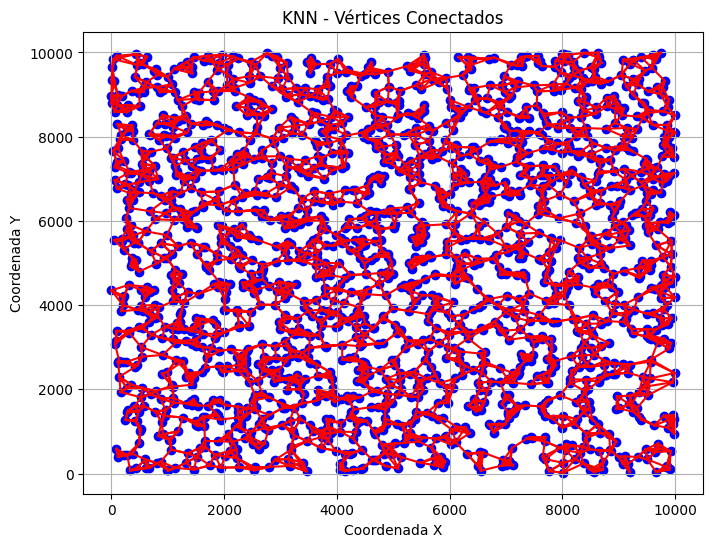

In [132]:
plot_graph(graph)

Caminho encontrado até o ponto de chegada:
Caminho resposta: [(121, 9000), (107, 8749), (64, 8590), (282, 8584), (271, 8661), (302, 8749), (503, 8727), (499, 9046), (577, 9073), (360, 9086), (587, 9165), (804, 9179), (865, 9059), (1130, 9066), (1180, 8871), (1255, 8721), (1264, 8430), (1415, 8310), (1620, 8268), (1870, 8282), (2062, 8152), (1785, 7908), (1599, 7695), (1593, 7503), (1524, 7471), (1427, 7307), (1599, 7194), (1814, 7200), (1979, 7202), (1941, 7234), (2168, 7228), (2345, 7344), (2180, 7397), (2126, 7441), (2290, 7484), (2387, 7537), (2539, 7465), (2677, 7494), (2849, 7384), (2840, 7137), (2607, 7000), (2548, 6701), (2327, 6557), (2170, 6490), (2252, 6225), (2568, 6246), (2665, 6100), (2814, 6022), (2990, 6043), (3137, 5948), (3078, 5825), (3246, 5854), (3350, 5932), (3482, 6002), (3455, 6065), (3468, 6254), (3321, 6313), (3375, 6514), (3603, 6476), (3722, 6447), (3924, 6387), (3941, 6443), (4064, 6459), (4139, 6732), (4284, 6737), (4315, 6733), (4513, 6623), (4359, 6424), 

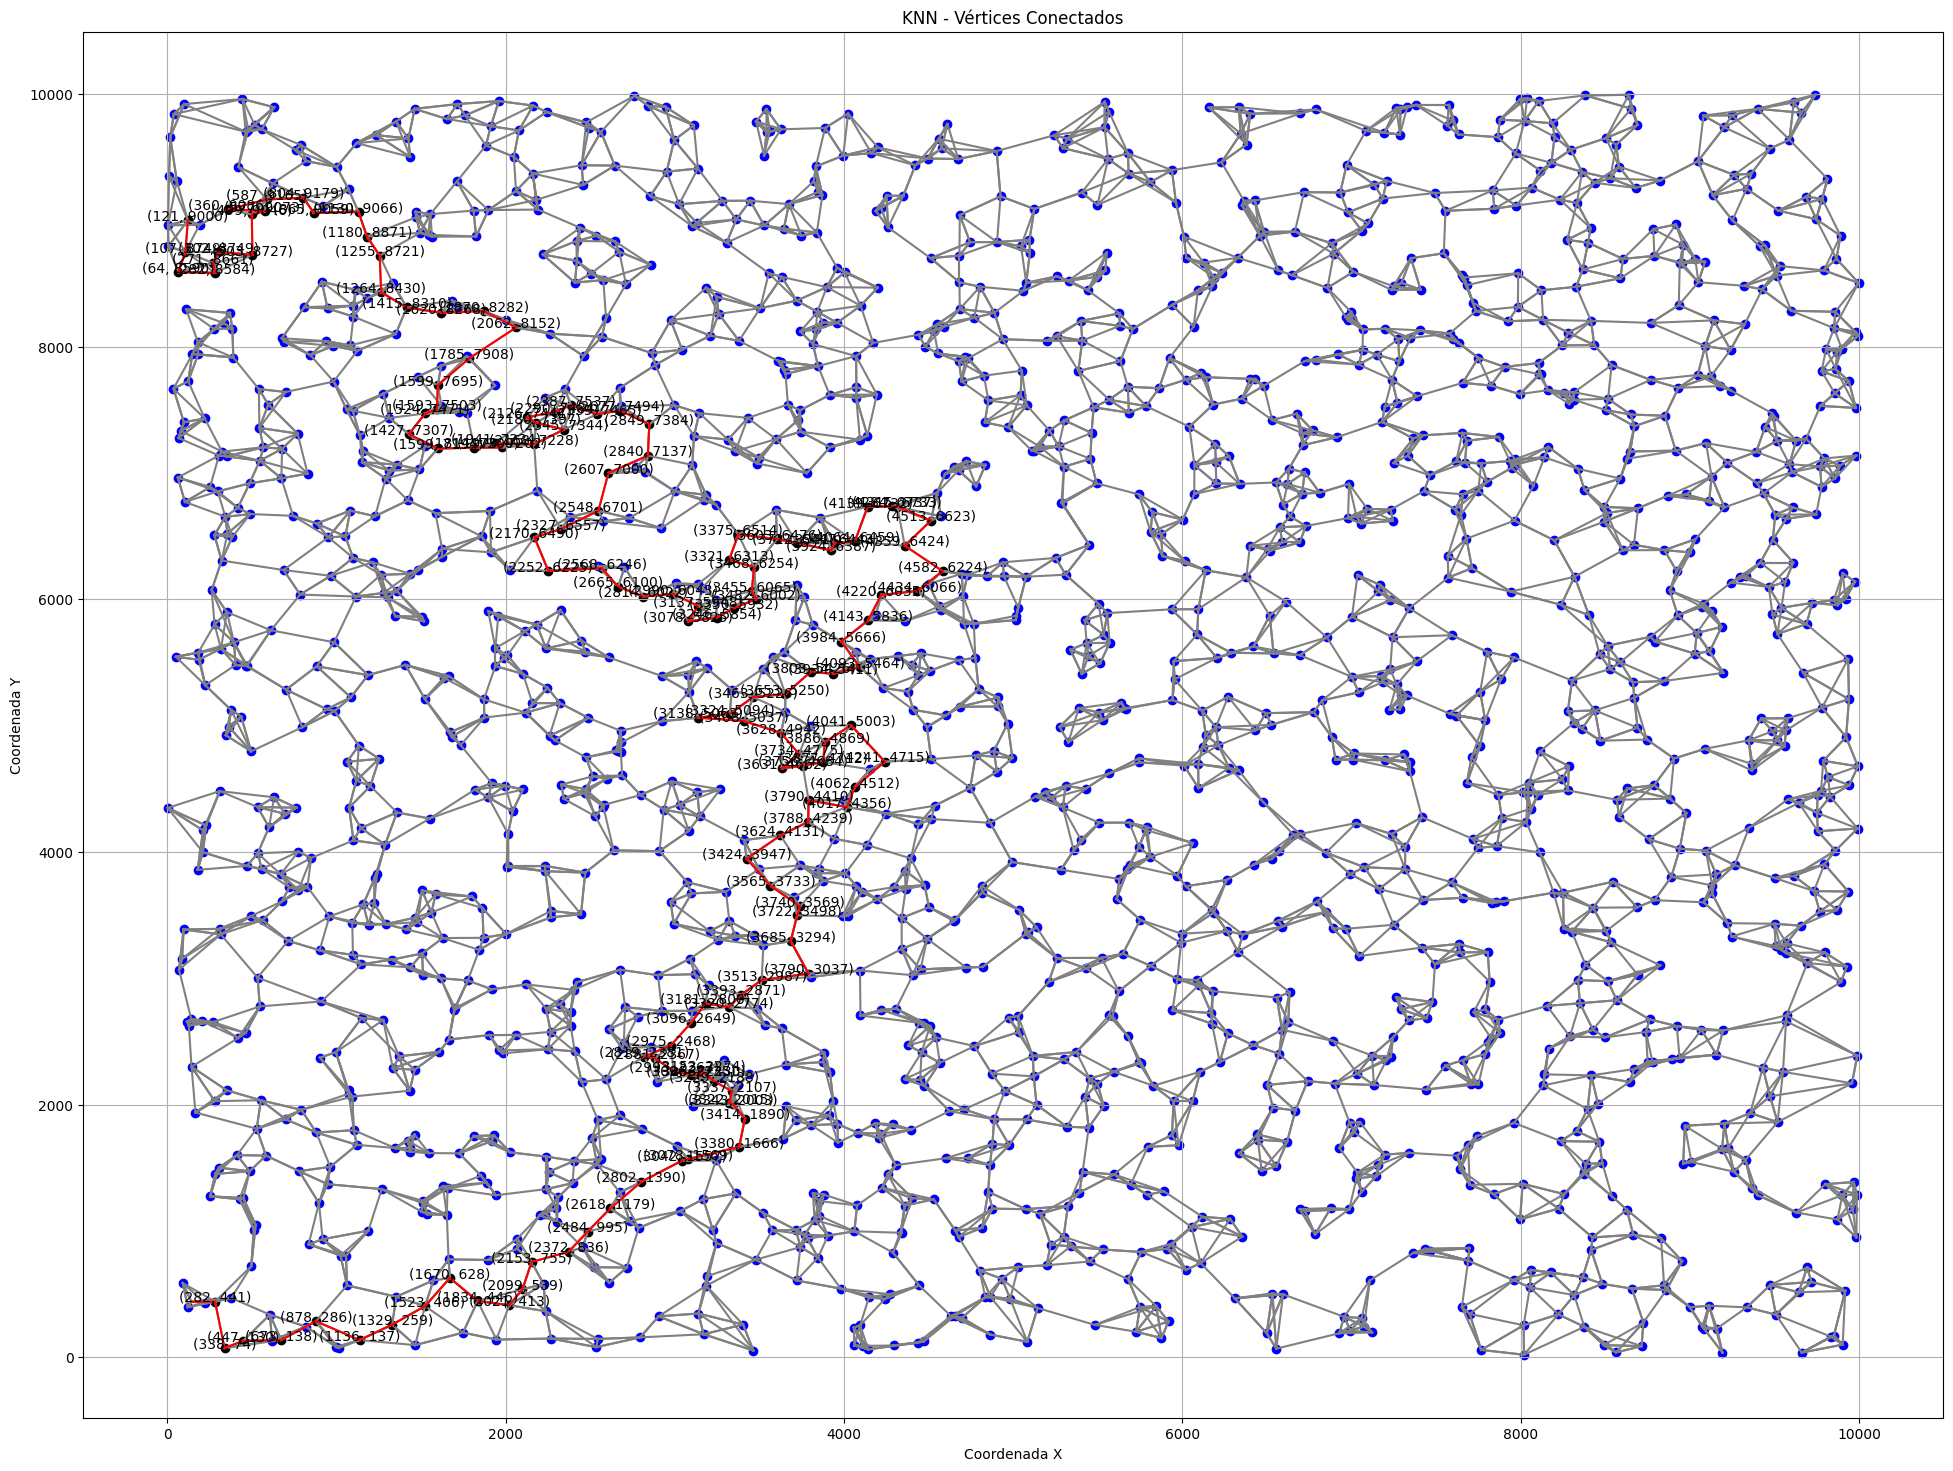

In [133]:
start_node = (121, 9000)
goal_node = (142, 440)
start_time = time.time() #antes de executar a busca

path = greedy_best_first_search(graph, start_node, goal_node)

if path:
  print("Caminho encontrado até o ponto de chegada:")
  print('Caminho resposta:', path)
  print('Distância percorrida:', calculate_path_distance(path))
  print('Tempo:', elapsed_time)
  print('Nós:', len(path))
  plot_result(graph, path)   
else:
  print("Não foi possível encontrar um caminho até o ponto de chegada.")

elapsed_time = time.time() - start_time # dps de executar